# THis is only just for practice. It is not a programming problem solution.  

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessingimport StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [121]:
df = pd.read_csv("placement_dataset.csv")

In [122]:
df.isnull().sum()

score     0
cgpa      0
placed    0
dtype: int64

In [123]:
df.head()

,score,cgpa,placed
0,43.0,6.25,Yes
1,67.9,9.70,Yes
2,91.1,8.39,No
3,81.3,7.59,Yes
4,86.5,4.94,Yes


In [124]:
encoder = OneHotEncoder(sparse_output=False, drop='first', dtype = int)

In [125]:
df[['placement_Yes']] = encoder.fit_transform(df[['placed']])

In [126]:
df.drop(df[['placed']], axis=1)

,score,cgpa,placement_Yes
0,43.0,6.25,1
1,67.9,9.70,1
2,91.1,8.39,0
3,81.3,7.59,1
4,86.5,4.94,1
...,...,...,...
995,76.0,4.55,0
996,97.0,9.50,1
997,34.8,4.82,1
998,34.0,9.70,1


In [127]:
x = df[["score", "cgpa"]]
# y = np.array()
y = df["placement_Yes"]

In [128]:
x

,score,cgpa
0,43.0,6.25
1,67.9,9.70
2,91.1,8.39
3,81.3,7.59
4,86.5,4.94
...,...,...
995,76.0,4.55
996,97.0,9.50
997,34.8,4.82
998,34.0,9.70


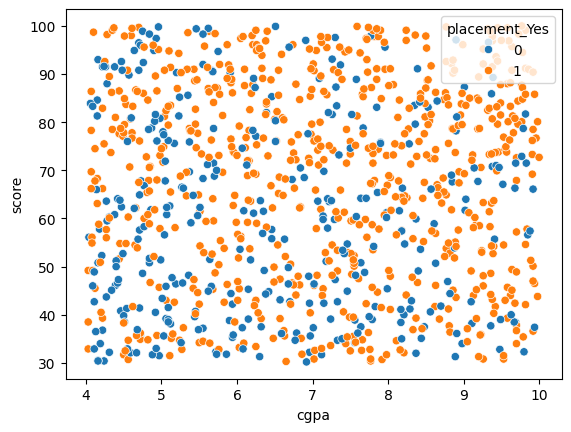

In [129]:
sns.scatterplot(x="cgpa", y="score", data= df, hue= "placement_Yes")
plt.show()

In [140]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42)

In [141]:
sc = StandardScaler()
x_train_scale = sc.fit_transform(x_train)
x_test_scale = sc.transform(x_train)

In [163]:
modelSvm = SVC(kernel='rbf',C=1.0, gamma='scale')
modelSvm.fit(x_train_scale, y_train)

SVC()

In [164]:
y_pred = modelSvm.predict(x_test_scale)

In [165]:
print("Accueracy score", accuracy_score(y_train, y_pred)*100)

Accueracy score 68.375


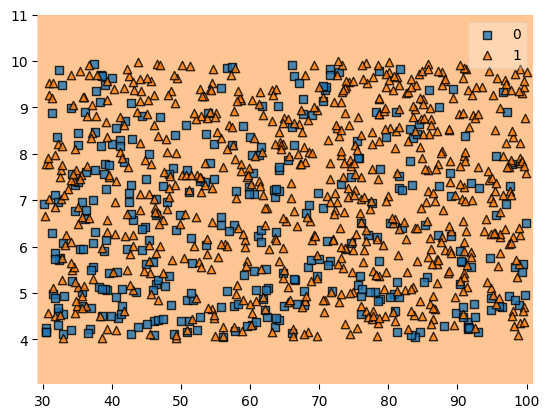

In [166]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=modelSvm)
plt.show()